In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import numpy as np

In [3]:
def conv_1d(x: 'array of floats', f: 'array of floats') -> 'array of floats':
    """ 
        len(f) is supposed to be odd: len(f) = 2r + 1
        len(x) is supposed to be greater than or equal to r + 1: len(x) >= r + 1
        conv_1d returns convolution of x and f as 1d array of floats
    """
    n = len(x)
    r = len(f) // 2
    #  -r  ...   -1     0     1    ...   r
    # f[0] ... f[r-1] f[r] f[r+1]  ... f[2r]
    M = 2*r + n
    tmp = np.zeros(M)
    # tmp[0] ... tmp[r-1] | tmp[r] ... tmp[n+r-1] | tmp[n+r] ... tmp[n+2r-1]
    #   0    ...    0     |  x[0]  ...    x[n]    |     0    ...      0
    ans = np.zeros(n)
    for i in range(r, n+r):
        tmp[i] = x[i-r]
    for i in range(n):
        for j in range(-r, r+1):
            ans[i] += tmp[i+r+j]*f[r+j]
    return ans

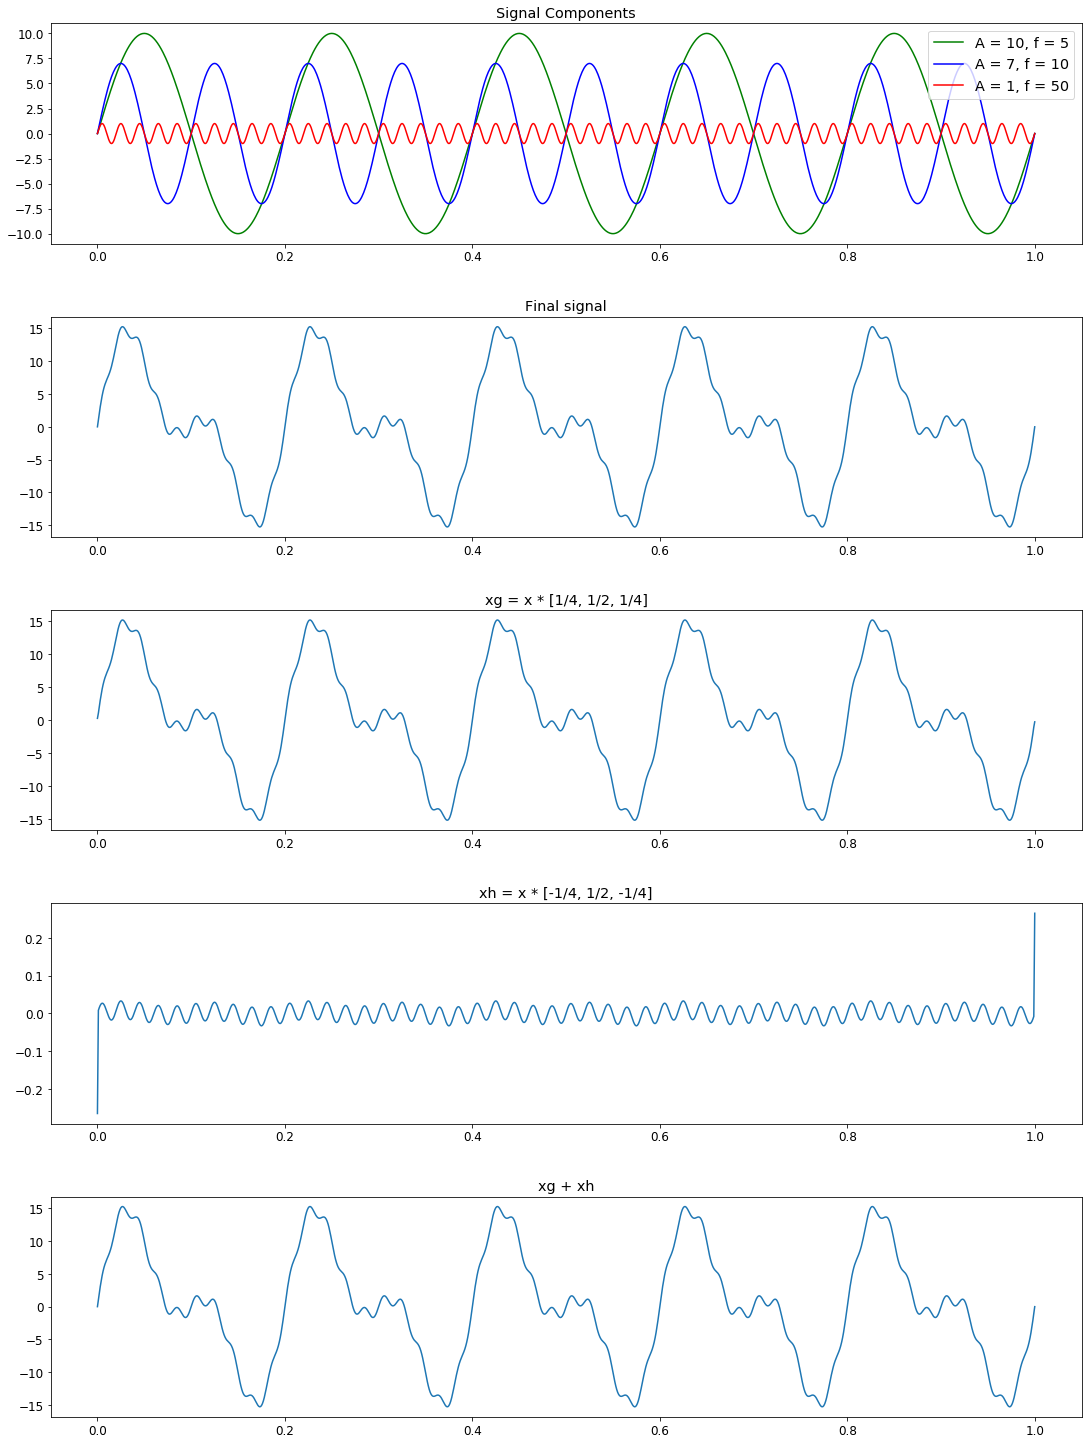

In [9]:
f = np.array([5, 10, 50])
A = np.array([10, 7, 1])
N = 1000
T = 1
dt = T / N
t = np.array([i*dt for i in range(0, N+1)])

fig, axarr = plt.subplots(5, 1, figsize = (15, 20))
colors = ['green', 'blue', 'red']
for j in range(3):
    label = 'A = ' + str(A[j]) + ', f = ' + str(f[j])
    axarr[0].plot(t, A[j]*np.sin(2 * np.pi * f[j] * t), color = colors[j], label = label)
axarr[0].legend(loc = 0, fontsize = 'large')
axarr[0].set_title('Signal Components')

x = np.zeros(N+1)
for j in range(3):
    x += A[j]*np.sin(2 * np.pi * f[j] * t)
axarr[1].plot(t, x)
axarr[1].set_title('Final signal')

g = np.array([1/4, 1/2, 1/4])
xg = conv_1d(x, g)
axarr[2].plot(t, xg)
axarr[2].set_title('xg = x * [1/4, 1/2, 1/4]')

h = np.array([-1/4, 1/2, -1/4])
xh = conv_1d(x, h)
axarr[3].plot(t, xh)
axarr[3].set_title('xh = x * [-1/4, 1/2, -1/4]')

axarr[4].plot(t, xg + xh)
axarr[4].set_title('xg + xh')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)